In [1]:
# Generic imports
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math,random,re
import time

In [2]:
import seaborn as sns

In [3]:
import matplotlib as mpl
import matplotlib.cm as cm

norm=mpl.colors.Normalize(vmin=-7,vmax=2)
cmap=cm.bwr
m=cm.ScalarMappable(norm=norm,cmap=cmap)


In [4]:
%reload_ext autoreload
%autoreload 1
from helper_tools import *
#from helper_tools_for_plotting import *

In [5]:
#Invariants
#ORDER_KEY="*ILVAGMFYWEDQNHCRKSTPBZ-"[::-1]
ORDER_KEY="*ILVAGMFYWEDQNHCRKSTP-"[::-1]

ORDER_LIST=list(ORDER_KEY)

In [6]:
import editdistance

In [7]:
wt_sequence="DEEEIRTTNPVATEQYGSVSTNLQRGNR"

In [8]:
data=pd.read_csv("processed_alignment_data.csv")

In [9]:
alignment_data=pd.DataFrame(columns=["aa_seq","mut","v97L_S"])
alignment_data["aa_seq"]=data["seq"]
alignment_data["v97L_S"]=8
alignment_data["mut"]=list(map(lambda x: editdistance.eval(x,wt_sequence),alignment_data["aa_seq"]))
alignment_data["source"]="a"

In [10]:
alignment_data.head()

aa_seq  mut  v97L_S source
0  DEEEIRTTNPVATEQYGSVSTNLQRGNR    0       8      a
1  DEEEIKTTNPVATEQYGTVATNLQSSNT    6       8      a
2  DEEEIRTTNPVATEQYGTVATNLQSSNT    5       8      a
3  DEEEIRTTNPVATEQYGTVSTNLQSSNT    4       8      a
4  DEEEIRTTNPVATEQYGSVSTNLQGGNT    2       8      a

In [11]:
columns="name,method,path_type,temperature,fitness_threshold,minimum_fitness, \
ins_ok,target_seq, mutant_seq,mutant_mask,group_id,path_id,mutant_id,num_mutations\
,mutant_score,binary_mask,binary_value".strip(" ").split(",")

paths_data=pd.read_csv("tissues_T21_paths.txt",header=None)
paths_data.columns=columns

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
paths_data.head(2)

name method   path_type  temperature fitness_threshold minimum_fitness  \
0  liver   temp   end_point         -2.0              -Inf             NaN   
1  liver   temp   end_point         -2.0              -Inf             NaN   

    ins_ok                     target_seq                     mutant_seq  \
0        0   QEEEIRQTNPVATEQYGSVSTNLQRGNR   QEEEIRQTNPVATEQYGSVSTNLQRGNR   
1        0   QEEEIRTTNPVSTEQYGSVSTNLQRGNR   QEEEIRTTNPVSTEQYGSVSTNLQRGNR   

                     mutant_mask  group_id  path_id  mutant_id  num_mutations  \
0   Q_____Q_____________________         1        1          1              2   
1   Q__________S________________         2        1          1              2   

   mutant_score binary_mask  binary_value  
0        1.5764          11             3  
1        1.4194          11             3

In [13]:
naive_data=[a.strip(" ") for a in list(paths_data[paths_data["name"]=="naive"][" mutant_seq"])]

In [14]:
measured_data=pd.read_csv("target.txt")
measured_data=measured_data.sample(frac=1).reset_index(drop=True)
measured_data=measured_data.groupby(["aa_seq","mask"],as_index=False).mean()
measured_data["source"]=list(map(lambda x: "r" if x in naive_data else "m" ,measured_data.aa_seq))

In [15]:
#clean memory path data
paths_data=[]

In [16]:
len(measured_data[measured_data["aa_seq"].str.len()==28]["aa_seq"].unique())

36562

In [17]:
all_data=pd.concat([alignment_data,measured_data[measured_data["aa_seq"].str.len()==28][["aa_seq","mut","v97L_S","source"]]])

In [18]:
measured_data=[]

In [19]:
all_data.iloc[:3]

aa_seq  mut  v97L_S source
0  DEEEIRTTNPVATEQYGSVSTNLQRGNR  0.0     8.0      a
1  DEEEIKTTNPVATEQYGTVATNLQSSNT  6.0     8.0      a
2  DEEEIRTTNPVATEQYGTVATNLQSSNT  5.0     8.0      a

In [20]:
all_data_one_hot=[]
labels=[]
for row in all_data.aa_seq:
    try:
        all_data_one_hot.append(translate_string_to_one_hot(row,ORDER_LIST))
    except:
        print(row)
#print (len(training_data_one_hot))
#plt.imshow(training_data_one_hot[0],cmap="Greys")
all_data_o=np.array([np.array(list(sample.flatten())).T for sample in all_data_one_hot])
#print(training_data.shape)

DXQNINFNLPVTNDNVLLPTDPIGGKSG
DWXNINFNLPVTNDNVLLPTDPIGGKTG
RDGRVTNPSRVVQXHVGHTHTRVTSGGT
SEAXTQSVN-------------------


In [21]:
len(all_data_one_hot)

37126

In [22]:
droppoint=-3.0905995705386702

Dont run this code again, just read the fixed holdoutset

In [23]:
test_data=pd.read_csv("holdout_set.csv")

In [24]:
len(test_data)

7150

In [25]:
test_data.head()

Unnamed: 0                        aa_seq  mut    v97L_S source
0       11116  DEEEIRTHNPVATSQYGSVSTNLQEGTG  5.0 -7.031951      r
1       69697  YEEEIRTDNPVATEQYGSVSTNLQRGNR  2.0 -8.453472      r
2       31404  DEEEIRTTNPVATEQYGSVSVNLERGNR  2.0  1.214229      r
3        4229  DEEAITTSNPVATHQYLSANTNLYRGNR  8.0 -4.868012      r
4        7526  DEEEILTTNPMVKEQYGSVSTNLQRGNR  4.0 -5.980499      r

In [26]:
new_test=pd.read_csv("vae2021_processed_data.csv", index_col=None)

In [27]:
new_test.head()

Unnamed: 0 category_orig    lin_fit   pred_fit     sampling  \
0           0       VAE-MSA -47.652505  29.069985  most_likely   
1           1       VAE-MSA -48.071833  28.955883  most_likely   
2           2       VAE-MSA -47.482053  28.946108  most_likely   
3           3       VAE-MSA -47.745287  28.280085  most_likely   
4           4       VAE-MSA -46.253139  28.170899  most_likely   

                             aa  wt_dist                          mask  \
0  DEEEIRTTNPVATEQYGVTATNLQNSNT        6  _________________VTA____NS_T   
1  SEEEIRTTNPVATEQYGTTATNLQSSNT        7  S________________TTA____SS_T   
2  DEEEIRTTNPVATEQYGVTATNLQNSTT        7  _________________VTA____NSTT   
3  DEEEIRTTNPVATEQYGVTATNLQSSNT        6  _________________VTA____SS_T   
4  DEEEIRTTNPVATEQYGTTATNLQNSNT        6  _________________TTA____NS_T   

   VAE_virus_S  mut category  wt_conserved_pos colors  beats_wt  viable  
0     6.660194  6.0  VAE-MSA              22.0   plum         1       1  
1     2.716090  7.0  VAE-MSA              21.0   plum         0       1  
2     6.619935  7.0  VAE-MSA              21.0   plum         1       1  
3     6.344426  6.0  VAE-MSA              22.0   plum         1       1  
4     6.148984  6.0  VAE-MSA              22.0   plum         1       1

In [28]:
new_test=new_test[["Unnamed: 0","aa","mut","VAE_virus_S",\
                   "sampling","viable","beats_wt", "category_orig","mask"]]

In [29]:
new_test.columns=["Unnamed: 0","aa_seq","mut","v97L_S","source", "viable","beats_wt","category","mask"]

In [30]:
#test_data=test_data.append(new_test)
test_data=new_test#[new_test.source=="most_likely"] #CHANGE this to all somehow
#test_data=test_data[new_test.v97L_S>-2.0260902496886164]

In [31]:
alignment_data=all_data[all_data.source=="a"]#.append(all_data[all_data.source=="r"])
#data_slice=all_data[(all_data.source!="a")&(~all_data.aa_seq.isin(test_data.aa_seq))]
surviving_data=alignment_data#.append(data_slice[data_slice["v97L_S"]>droppoint])
surviving_data=surviving_data.drop_duplicates()
len(surviving_data)

568

In [32]:
all_good_data=list(surviving_data["aa_seq"])

In [33]:
for x in random.sample(all_good_data[:30],20):
    print (x)

DEEEIRTTNPVATEQYGNVSNNLQNSNT
DEEEIRTTNPVATEQYGTVANNLQSSNT
SEEEIKTTNPVATEQYGVVADNLQQTNG
DEEEIRTTNPVATEQYGTVATNLQSSNT
SEEEIKTTNPVATEEYGIVADNLQQQNT
DEEEIRTTNPVATEQYGYVSNNLQNSNT
SEEEIKTTNPVATEQYGVVADNLQQQNT
SEEEIKTTNPVATEQYGVVADNLQQTNT
DEEEIRTTNPVATEQYGYVSNNLQDSNT
DEEEIRTTNPVATEQYGSVSTNLQSGNT
NEEEIKTTNPVATEEYGAVATNNQSANT
SEEEIKTTNPVATEQYGVVADNLQQQNA
DEEEIRTTNPVATEQYGTVSNNLQNSNA
DEEEIRTTNPVATEQYGSVSTNLQRGNR
DEEEIRTTNPVATEQYGTVSTNLQSSNT
DEEEIRTTNPVATEQYGSVSTYLQSGNT
SEEEIKATNPVATEQYGVVADNLQQQNT
DEEEIRTTNPVATEQYGTVSNNLQNSNT
SEEEIKTTNPVATEEYGVVATNLQSANT
DEEEIRPTNPVATEQYGTVSNNLQNSNT


In [34]:
#Encode training data in one_hot vectors
training_data_one_hot=[]
labels=[]
for row in all_good_data:
    try:
        training_data_one_hot.append(translate_string_to_one_hot(row,ORDER_LIST))
    except:
        print(row)
print (len(training_data_one_hot))
#plt.imshow(training_data_one_hot[0],cmap="Greys")
training_data=np.array([np.array(list(sample.flatten())).T for sample in training_data_one_hot])
print(training_data.shape)


DXQNINFNLPVTNDNVLLPTDPIGGKSG
DWXNINFNLPVTNDNVLLPTDPIGGKTG
RDGRVTNPSRVVQXHVGHTHTRVTSGGT
SEAXTQSVN-------------------
564
(564, 616)


In [35]:
len(training_data)

564

In [36]:
alignment_data=all_data[all_data.source=="a"]#.append(all_data[all_data.source=="r"])
#data_slice=all_data[(all_data.source!="a")&(~all_data.aa_seq.isin(test_data.aa_seq))]
data_slice=all_data[(all_data.source=="r")&(~all_data.aa_seq.isin(test_data.aa_seq))]
surviving_data=alignment_data.append(data_slice[data_slice["v97L_S"]>droppoint])
surviving_data=surviving_data.drop_duplicates()
len(surviving_data)
all_good_data=list(surviving_data["aa_seq"])
training_data_one_hot_r=[]
labels=[]
for row in all_good_data:
    try:
        training_data_one_hot_r.append(translate_string_to_one_hot(row,ORDER_LIST))
    except:
        print(row)
print (len(training_data_one_hot_r))
#plt.imshow(training_data_one_hot[0],cmap="Greys")
training_data_r=np.array([np.array(list(sample.flatten())).T for sample in training_data_one_hot_r])
print(training_data_r.shape)

DXQNINFNLPVTNDNVLLPTDPIGGKSG
DWXNINFNLPVTNDNVLLPTDPIGGKTG
RDGRVTNPSRVVQXHVGHTHTRVTSGGT
SEAXTQSVN-------------------
1231
(1231, 616)


In [37]:
alignment_data=all_data[all_data.source=="a"]#.append(all_data[all_data.source=="r"])
data_slice=all_data[(all_data.source!="a")&(~all_data.aa_seq.isin(test_data.aa_seq))]
surviving_data=alignment_data.append(data_slice[data_slice["v97L_S"]>droppoint])
surviving_data=surviving_data.drop_duplicates()
len(surviving_data)
all_good_data=list(surviving_data["aa_seq"])
training_data_one_hot_all=[]
labels=[]
for row in all_good_data:
    try:
        training_data_one_hot_all.append(translate_string_to_one_hot(row,ORDER_LIST))
    except:
        print(row)
print (len(training_data_one_hot_all))
#plt.imshow(training_data_one_hot[0],cmap="Greys")
training_data_all=np.array([np.array(list(sample.flatten())).T for sample in training_data_one_hot_all])
print(training_data_r.shape)

DXQNINFNLPVTNDNVLLPTDPIGGKSG
DWXNINFNLPVTNDNVLLPTDPIGGKTG
RDGRVTNPSRVVQXHVGHTHTRVTSGGT
SEAXTQSVN-------------------
23268
(1231, 616)


In [38]:
sns.set_style("white")

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='distance from wt', ylabel='Density'>

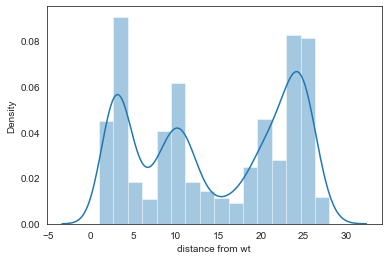

In [39]:
sns.distplot(test_data.mut,axlabel="distance from wt")

In [40]:
surviving_data.tail()

aa_seq  mut    v97L_S source
70028  YESEINTTNPVATEPYGSVSENLQRGTR  6.0  1.511785      m
70030  YESEIRTTNPVSTEQYGDVSTALQNGNR  6.0  1.295945      m
70039  YEVEIRTTNPVATEQYGSVAENEQRGNR  5.0 -2.190229      m
70069  YSEEVRTTNPMATMQYGSVSCNLQAGNV  8.0 -0.771151      m
70070  YSEEVRTTNPMATMQYGSVSTNLQAGNV  7.0 -0.173738      m

In [41]:
surviving_data["seq_len"]=surviving_data["aa_seq"].apply(lambda x: len(x))

In [42]:
surviving_data["source"].unique()

array(['a', 'm', 'r'], dtype=object)

In [43]:
surviving_data["viable"]=surviving_data["v97L_S"].apply(lambda x: 1 if x>droppoint else 0)

In [44]:
surviving_data.tail()

aa_seq  mut    v97L_S source  seq_len  viable
70028  YESEINTTNPVATEPYGSVSENLQRGTR  6.0  1.511785      m       28       1
70030  YESEIRTTNPVSTEQYGDVSTALQNGNR  6.0  1.295945      m       28       1
70039  YEVEIRTTNPVATEQYGSVAENEQRGNR  5.0 -2.190229      m       28       1
70069  YSEEVRTTNPMATMQYGSVSCNLQAGNV  8.0 -0.771151      m       28       1
70070  YSEEVRTTNPMATMQYGSVSTNLQAGNV  7.0 -0.173738      m       28       1

In [45]:
surviving_data.mean()

mut         4.442807
v97L_S      0.577244
seq_len    28.000000
viable      1.000000
dtype: float64

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


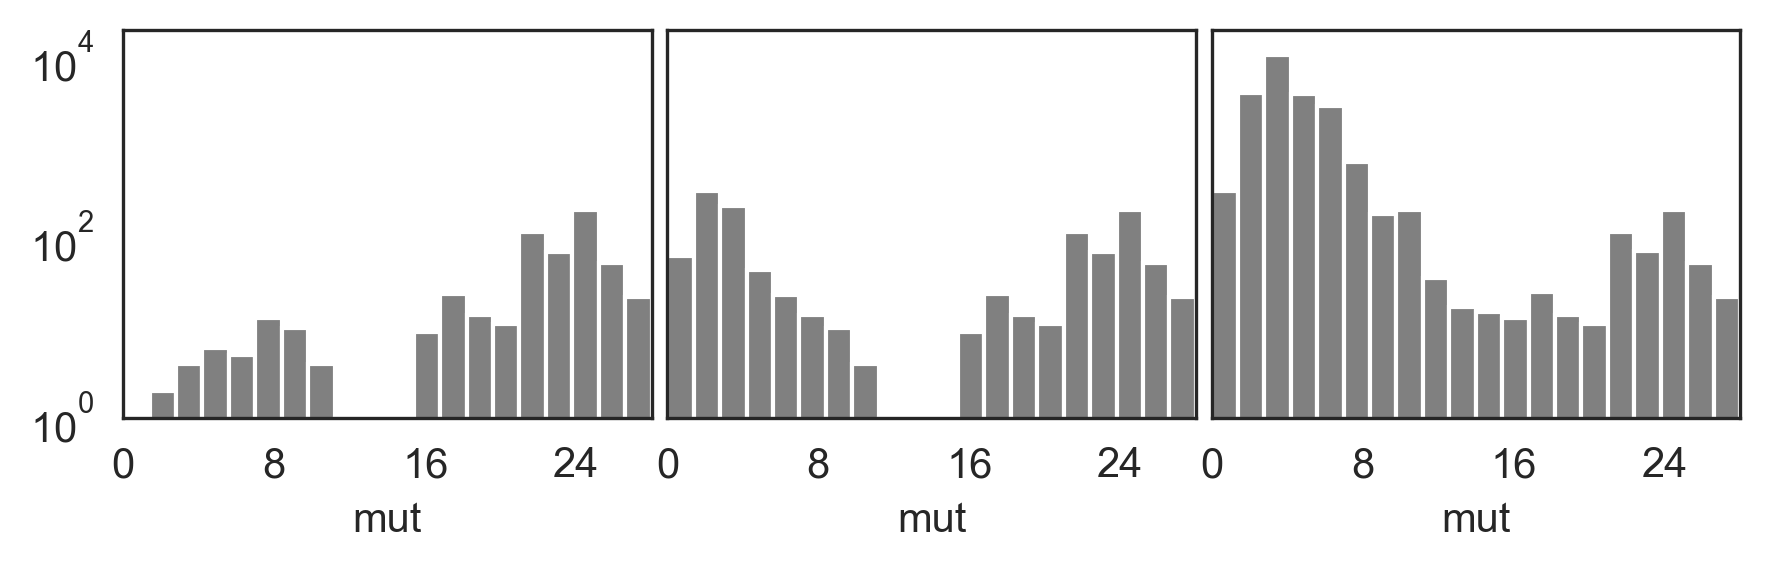

In [46]:
plt.figure(figsize=(6,2),dpi=300)
plt.subplot(1, 3, 1)
sns.distplot(surviving_data[surviving_data.source=="a"].mut, color="grey", bins=20,kde=False,hist_kws={'log':True, 'alpha':1})

plt.ylim(1,20000)
plt.xticks(range(0,29,8))
plt.xlim(0,28)
plt.subplot(1, 3, 2)

sns.distplot(surviving_data[surviving_data.source.isin(["a","r"])].mut,color="grey", bins=20,kde=False, hist_kws={'log':True,'alpha':1})
plt.ylim(1,20000)
plt.yticks([])
plt.xticks(range(0,29,8))
plt.xlim(0,28)
plt.subplot(1, 3, 3)
sns.distplot(surviving_data.mut,bins=20,kde=False, color="grey", hist_kws={'log':True, 'alpha':1})

plt.ylim(1,20000)
plt.yticks([])
plt.xticks(range(0,29,8))
plt.xlim(0,28)
plt.tight_layout(w_pad=0.1,h_pad=0.1)

#plt.savefig("new_figs/distance_distribution.pdf")

In [47]:
surviving_data[surviving_data.source=="a"].mut.mean()

21.889084507042252

In [48]:
surviving_data.mut.mean()

4.442806806462702

In [49]:
surviving_data[surviving_data.source.isin(["a","r"])].mut.mean()

11.48744939271255

In [50]:
keep=len(test_data)
target_values_singles=list(test_data.v97L_S)[:keep]
mutants=[m for m in test_data.aa_seq][:keep] #note that you change index to 1


In [51]:
mutants[0]

'DEEEIRTTNPVATEQYGVTATNLQNSNT'

In [52]:
#Test data with wt at 0 index
one_hot_mutants=[]
mutants_plus=mutants
for mutant in mutants_plus:
    one_hot_mutants.append(translate_string_to_one_hot("".join(mutant),ORDER_LIST))

test_data_plus=np.array([np.array(list(sample.flatten())).T for sample in one_hot_mutants])

In [53]:
print(len(test_data_plus))
test_data.head()

7830


Unnamed: 0                        aa_seq  mut    v97L_S       source  \
0           0  DEEEIRTTNPVATEQYGVTATNLQNSNT  6.0  6.660194  most_likely   
1           1  SEEEIRTTNPVATEQYGTTATNLQSSNT  7.0  2.716090  most_likely   
2           2  DEEEIRTTNPVATEQYGVTATNLQNSTT  7.0  6.619935  most_likely   
3           3  DEEEIRTTNPVATEQYGVTATNLQSSNT  6.0  6.344426  most_likely   
4           4  DEEEIRTTNPVATEQYGTTATNLQNSNT  6.0  6.148984  most_likely   

   viable  beats_wt category                          mask  
0       1         1  VAE-MSA  _________________VTA____NS_T  
1       1         0  VAE-MSA  S________________TTA____SS_T  
2       1         1  VAE-MSA  _________________VTA____NSTT  
3       1         1  VAE-MSA  _________________VTA____SS_T  
4       1         1  VAE-MSA  _________________TTA____NS_T

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='v97L_S', ylabel='Density'>

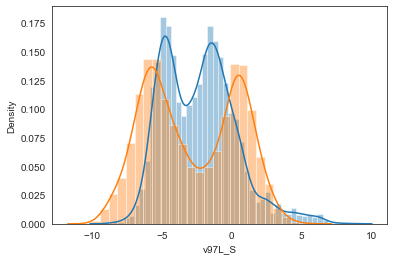

In [54]:
clean_data=test_data.replace([np.inf, -np.inf], np.nan).dropna()
heldout_data=pd.read_csv("holdout_set.csv")
sns.distplot(clean_data.v97L_S,axlabel="measured fitness")
sns.distplot(heldout_data.v97L_S.replace([np.inf, -np.inf], np.nan).dropna())

In [55]:
batch_size = 5
original_dim=len(ORDER_LIST)*28
output_dim=len(ORDER_LIST)*28
latent_dim = 2
epsilon_std = 1.0

In [57]:
from tensorflow.keras.models import load_model


In [58]:
encoder = load_model('encoder_align.h5')


In [59]:
generator=load_model('generator_align.h5')

In [61]:
#encoder = Model(x, z_mean)
sample_points=10000#data_set_size
PRUNED_SEQ_LENGTH=28
sample_size=batch_size*int(len(test_data_plus)/batch_size)
sample_for_averging_size=100
sequence_size=PRUNED_SEQ_LENGTH
digit_size = len(ORDER_LIST)

#wildtype in red
x_train_encoded = encoder.predict(training_data[:560], batch_size=batch_size)
x_test_encoded=encoder.predict(test_data_plus[:keep], batch_size=batch_size)
wt_encoding=x_train_encoded[0].reshape(1,latent_dim)
        

In [62]:
c=list(map(m.to_rgba,test_data.v97L_S))
#c_rand=list(map(m.to_rgba,rand_surviving_data.v97L_S[-600:]))

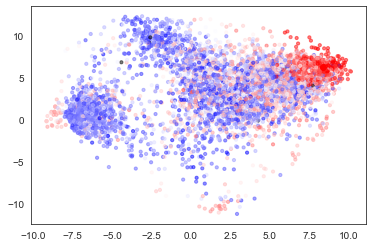

In [64]:
#cmap
#plt.scatter(x_train_encoded[-600:,0], x_train_encoded[-600:,1],c=c_rand ,alpha=0.3)

plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1],c= c,alpha=0.5,s=10)
plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],c="r" ,alpha=1)


In [65]:
len(x_test_encoded)

7830

In [66]:
clean_test=test_data.replace([np.inf, -np.inf,np.nan], -10)

In [67]:
clean_test.head()

Unnamed: 0                        aa_seq  mut    v97L_S       source  \
0           0  DEEEIRTTNPVATEQYGVTATNLQNSNT  6.0  6.660194  most_likely   
1           1  SEEEIRTTNPVATEQYGTTATNLQSSNT  7.0  2.716090  most_likely   
2           2  DEEEIRTTNPVATEQYGVTATNLQNSTT  7.0  6.619935  most_likely   
3           3  DEEEIRTTNPVATEQYGVTATNLQSSNT  6.0  6.344426  most_likely   
4           4  DEEEIRTTNPVATEQYGTTATNLQNSNT  6.0  6.148984  most_likely   

   viable  beats_wt category                          mask  
0       1         1  VAE-MSA  _________________VTA____NS_T  
1       1         0  VAE-MSA  S________________TTA____SS_T  
2       1         1  VAE-MSA  _________________VTA____NSTT  
3       1         1  VAE-MSA  _________________VTA____SS_T  
4       1         1  VAE-MSA  _________________TTA____NS_T

In [68]:
def recolor(df):
    colors=[]
    for i, row in df.iterrows(): 
        if row["viable"]:
           if row["beats_wt"]:
              colors.append("springgreen")
           else:
              colors.append("yellow")
        else:
           colors.append("dimgrey")
    return colors

In [69]:
c1=recolor(test_data)

In [70]:
def reduce_pwm(pwm):
    new_pwm=pwm[1:-1,:]
    new_pwm = normalize(new_pwm,axis=0, norm='l1')
    return new_pwm
    
def random_sample_from_induced_prob(pwm):
      pwm=reduce_pwm(pwm)
      other_seq = []
      indexes=[]

      for i in range(pwm.shape[1]):
        col_sum = 0
        cumul_sum = []
        for j in range(pwm.shape[0]):
           col_sum += pwm[j][i]
           cumul_sum.append(col_sum)
        
        prob = random.random()
        selected=-3
        for k in range(len(cumul_sum) - 1):
          if prob >= cumul_sum[k] and prob <= cumul_sum[k + 1]:
            selected = k+1
            break
        indexes.append(selected)
        other_seq.append(ORDER_LIST[selected+1])
        out_seq="".join(other_seq)
    
      return out_seq#,indexes,cumul_sum,prob

In [71]:
natural_serotypes=pd.read_csv('../common_aavs_df_with_t21_info_nov23.csv')
t21_natural=natural_serotypes[["name","tile","distance_to_aav2"]]
t21_natural=t21_natural[t21_natural['name'].str.startswith("AAV")]
t21_natural=t21_natural.iloc[0:12]
t21_natural.head()

name                          tile  distance_to_aav2
0  AAV1  DEEEIKATNPVATERFGTVAVNFQSSST                12
1  AAV2  DEEEIRTTNPVATEQYGSVSTNLQRGNR                 0
2  AAV3  DEEEIRTTNPVATEQYGTVANNLQSSNT                 6
3  AAV4  SEEELAATNATDTDMWGNLPGGDQSNSN                20
4  AAV5  SESETQPVNRVAYNVGGQMATNNQSSTT                19

In [72]:
one_hot_mutants=[]
mutants_plus=mutants
for i,row in t21_natural.iterrows():
    mutant=row["tile"]
    one_hot_mutants.append(translate_string_to_one_hot("".join(mutant),ORDER_LIST))

test_data_naturals=np.array([np.array(list(sample.flatten())).T for sample in one_hot_mutants])

In [73]:
x_naturals_encoded = encoder.predict(test_data_naturals, batch_size=batch_size)


In [74]:
len(training_data_one_hot_r), len(training_data_one_hot_all)

(1231, 23268)

In [75]:
x_train_encoded_r=encoder.predict(training_data_r, batch_size=batch_size)

In [76]:
x_train_encoded_all=encoder.predict(training_data_all, batch_size=batch_size)

In [77]:
len(x_naturals_encoded)

12

In [78]:
test_data.nlargest(10,"v97L_S")

Unnamed: 0                        aa_seq   mut    v97L_S       source  \
2548        2568  DEEEIATTNPVATEQYGEVSTNLQRGGR   3.0  8.750552  most_likely   
2543        2563  DEEEIATTNPVATEQYGEVSTNLQRGNR   2.0  8.366649  most_likely   
2840        2860  DEQEVAATNPVGTEVYGGVATNLQRTTT  11.0  7.813858  most_likely   
2837        2857  DEQEVAATNPVGTEIYGGVATNLQRTTT  11.0  7.696729  most_likely   
2762        2782  DEQEVAATNPVSTEIYGGVATNLQRTTT  11.0  7.582630  most_likely   
1255        1266  DEEEIRTTNPVATEQYGTVSTNLQRGNT   2.0  7.254887  most_likely   
2539        2559  DEEEIRTTNPVATEQYGSVSTDLQRGER   2.0  7.123681  most_likely   
2887        2907  DEQEVAATNPVGTEIYGGVATNLQNTTT  12.0  7.072987  most_likely   
6659        2879  DEEEIRTTNSVATEQYGSVSTNLQRGNE   2.0  6.886850       linear   
12            12  DEEEIRTTNPVATEQYGVTADNLQNSST   8.0  6.796274  most_likely   

      viable  beats_wt  category                          mask  
2548       1         1  VAE-MSA+  _____A___________E________G_  
2543       1         1  VAE-MSA+  _____A___________E__________  
2840       1         1  VAE-MSA+  __Q_VAA____G__V__G_A_____TTT  
2837       1         1  VAE-MSA+  __Q_VAA____G__I__G_A_____TTT  
2762       1         1  VAE-MSA+  __Q_VAA____S__I__G_A_____TTT  
1255       1         1  VAE-MSAr  _________________T_________T  
2539       1         1  VAE-MSA+  _____________________D____E_  
2887       1         1  VAE-MSA+  __Q_VAA____G__I__G_A____NTTT  
6659       1         1   IS-MSA+  _________S_________________E  
12         1         1   VAE-MSA  _________________VTAD___NSST

In [79]:
color_key2={ "IS-MSA":"salmon" , "VAE-MSA":"cyan" , "VAE-MSA+":"darkblue" , "IS-MSA+":"darkred",\
          "IS-MSAr":"red", "VAE-MSAr":"royalblue"}
test_data["colors"]=test_data["category"].map(color_key2)


In [80]:
test_data_rs_indices=test_data[test_data.source=="rand_samp"].index
test_data_lin_indices=test_data[test_data.source=="linear"].index
test_data_top_indices=test_data.nlargest(100,"v97L_S").index

In [84]:
def sample_latent_space(x, y, step_size, max_dist, num_points,visualize=True):
  collected_points = [[x,y]]
  steps_taken = int(max_dist/step_size)
  r = 0
  if visualize:
     plt.plot([x],[y],'ro')

  for i in range(1, steps_taken):
    step_array = []
    r = r + step_size
    for index in range(num_points):
      x_new = x + r*math.cos((index*2*math.pi)/num_points)
      y_new = y + r*math.sin((index*2*math.pi)/num_points)
      step_array.append([x_new,y_new])
      if visualize:
          plt.plot([x_new],[y_new],'ro')
          plt.gca().set_aspect('equal', adjustable='box')
    collected_points.extend(step_array)
  return ([x[0] for x in collected_points],[y[1] for y in collected_points])
def center_of_mass(i):
    return np.mean(i[:,0]),np.mean(i[:,1])

In [85]:
cx,cy=center_of_mass(x_train_encoded)

#x1,y1 = sample_latent_space (cx,cy, 1, 20, 32, visualize=False)
x1,y1 = sample_latent_space (cx,cy, 1, 15, 32, visualize=False)

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([], [])

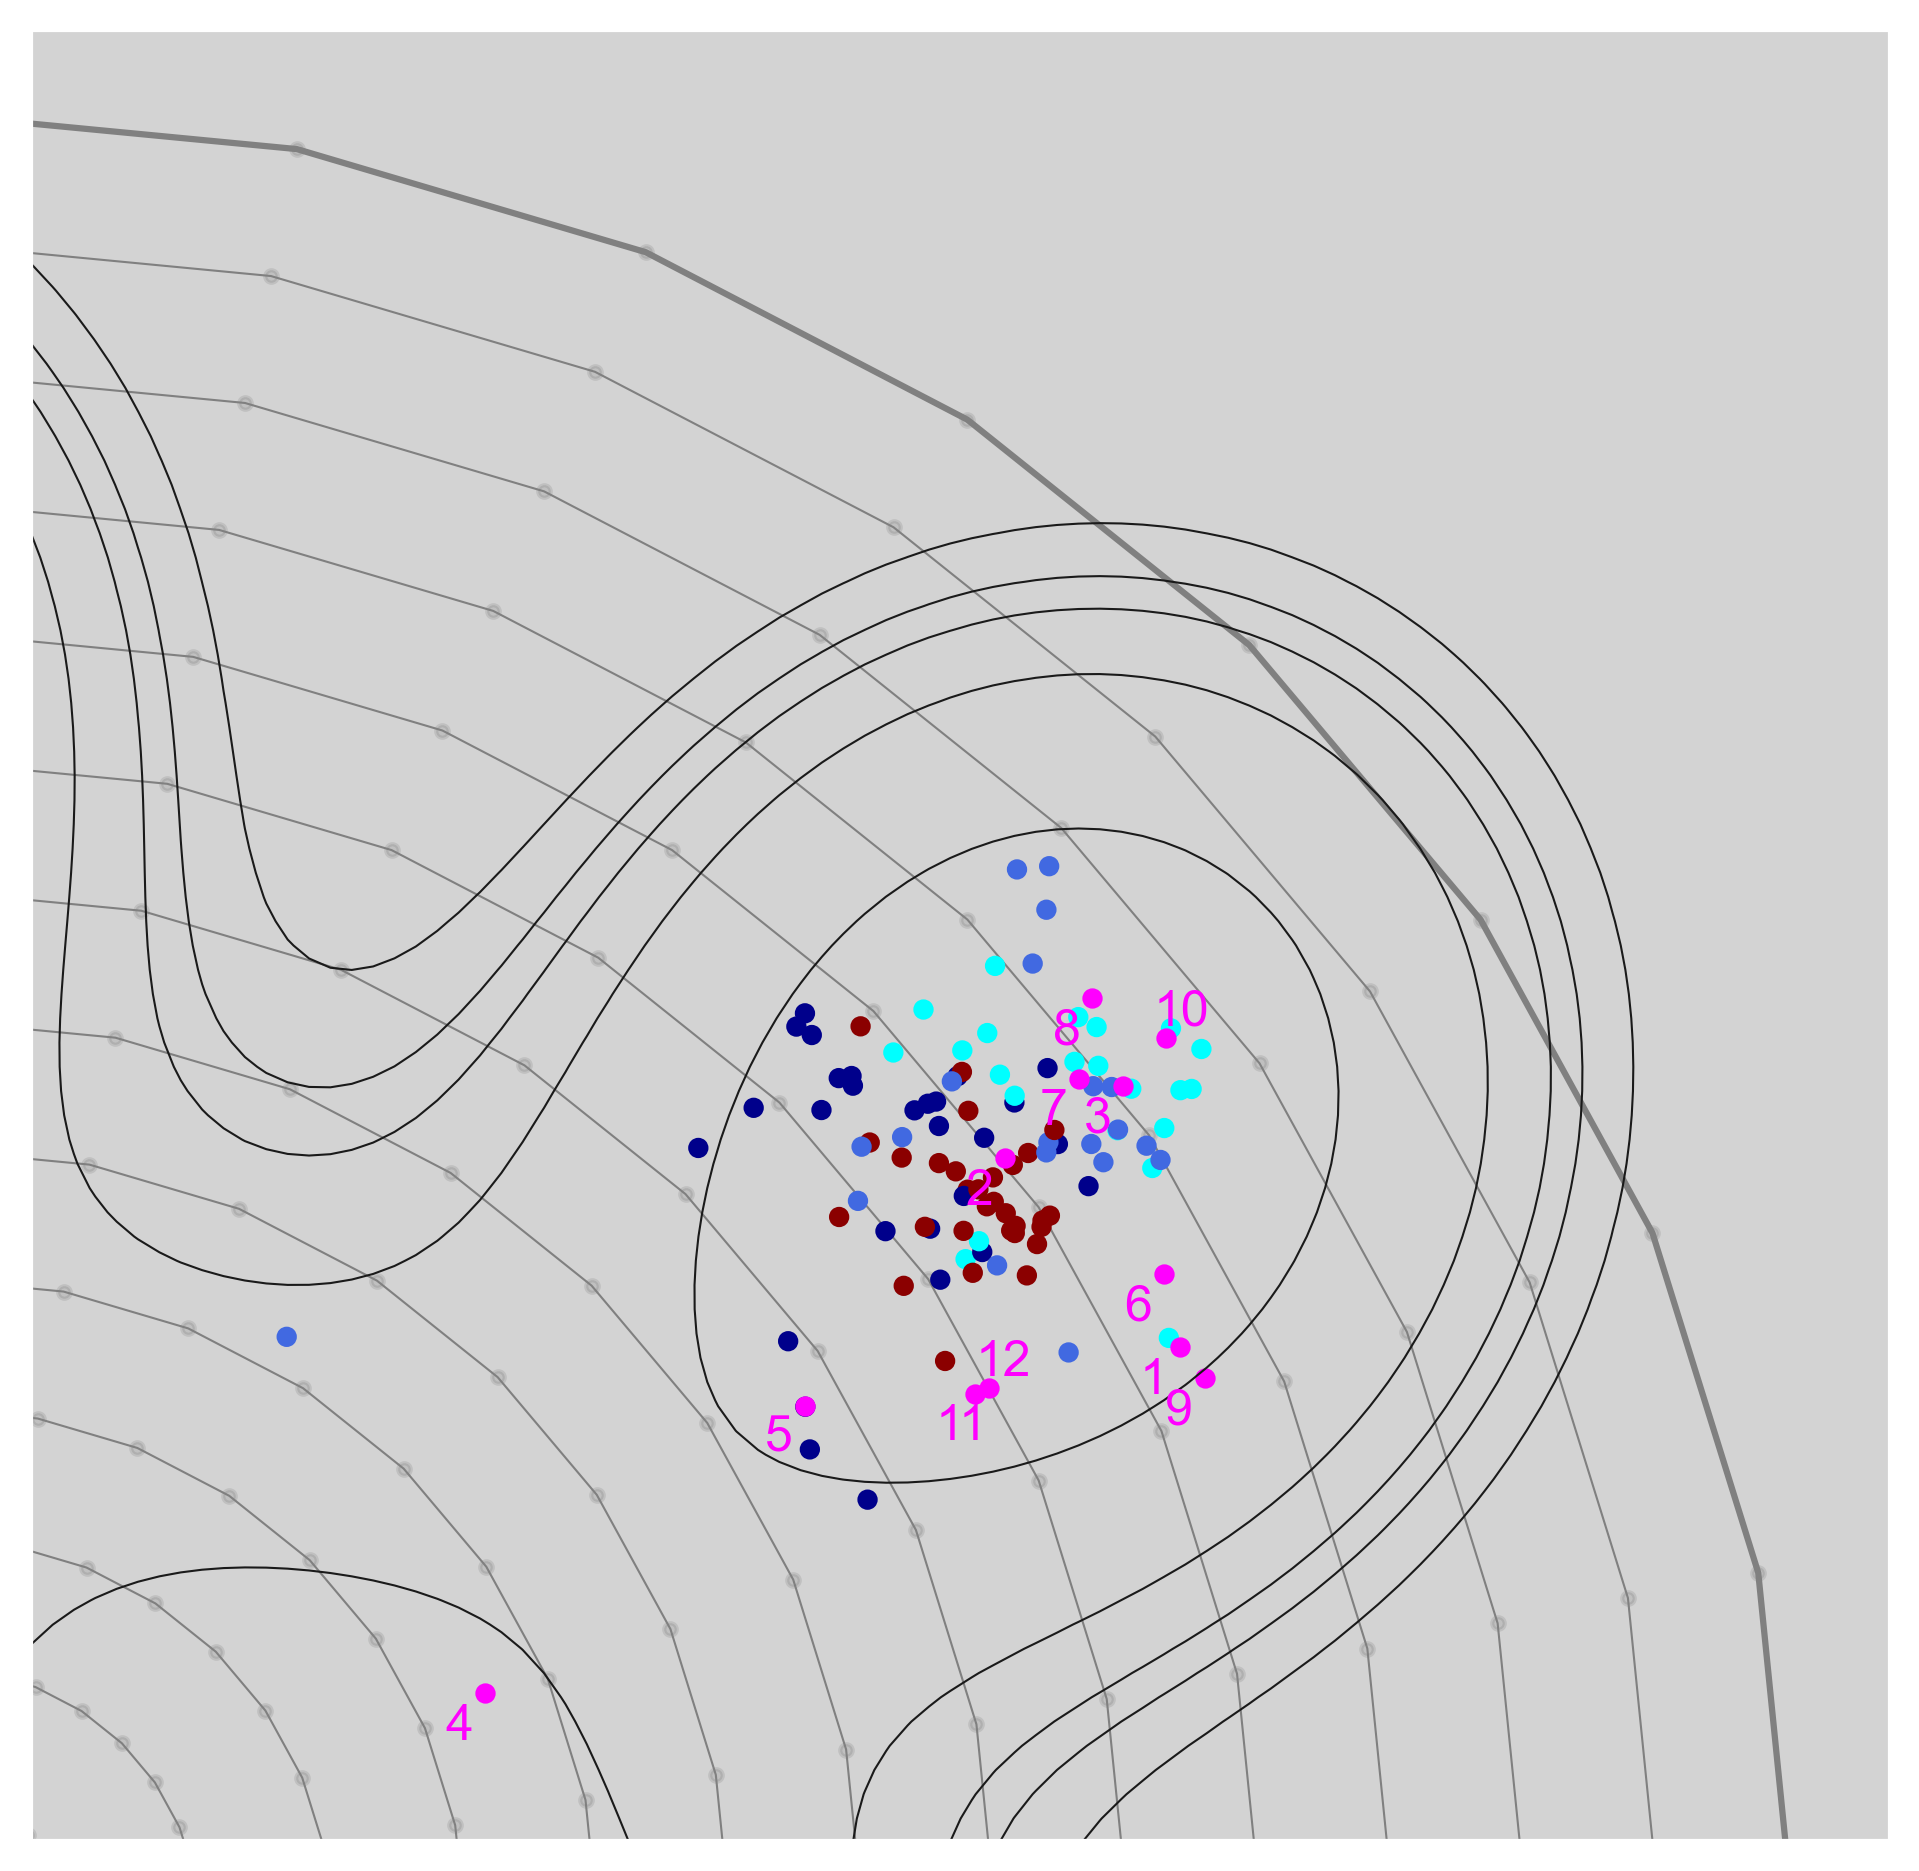

In [86]:
fig = plt.figure(figsize=(8,8),dpi=300)
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'w'})

#plt.pcolor(span,span,probs,cmap="bwr",vmin=-8,vmax=6,alpha=0.1)
#plt.colorbar()


plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=3,linewidth=0.5, zorder=-1)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="grey",alpha=1, linewidth=0.5,zorder=-1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="grey",alpha=1,zorder=-1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="grey",alpha=1,zorder=-1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="grey",alpha=1,zorder=-1)

#sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Greys",shade=True,shade_lowest=False,n_level=30)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],c="gold" ,alpha=1)

# plt.scatter(x_test_encoded[test_data_rs_indices, 0], x_test_encoded[test_data_rs_indices, 1],marker="^",c= "deepskyblue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_ml_indices, 0], x_test_encoded[test_data_ml_indices, 1],marker=".",c= "blue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_lin_indices, 0], x_test_encoded[test_data_lin_indices, 1],marker="x",c= "orange",alpha=1,s=4)
plt.scatter(x_test_encoded[test_data_top_indices, 0], x_test_encoded[test_data_top_indices, 1],marker="o",c=test_data.iloc[test_data_top_indices]["colors"],alpha=1,s=15)

#plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],c="purple" ,alpha=1)
plt.scatter(x_naturals_encoded[:,0], x_naturals_encoded[:,1],c="magenta" ,alpha=1,s=15)

for i,row in t21_natural.iterrows():
    if i not in [9,11]:
        plt.annotate(row['name'][3:],\
                 (x_naturals_encoded[i,0]-0.3,x_naturals_encoded[i,1]-0.35),alpha=1, color="magenta")
    else:
        plt.annotate(row['name'][3:],\
                 (x_naturals_encoded[i,0]-0.1,x_naturals_encoded[i,1]+0.1),alpha=1, color="magenta")
num=40
point=np.array([x1[num],y1[num]]).reshape(1,-1)
#plt.scatter(x1[0],y1[0],c="c")
#plt.scatter(x1[num],y1[num],c="b")

plt.xlim(1,15)
plt.ylim(1,15)
plt.grid(False)
plt.xticks([])
plt.yticks([])
#plt.savefig("Top100_projection.pdf")

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'n_level'
  cset = contour_func(
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other argument

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


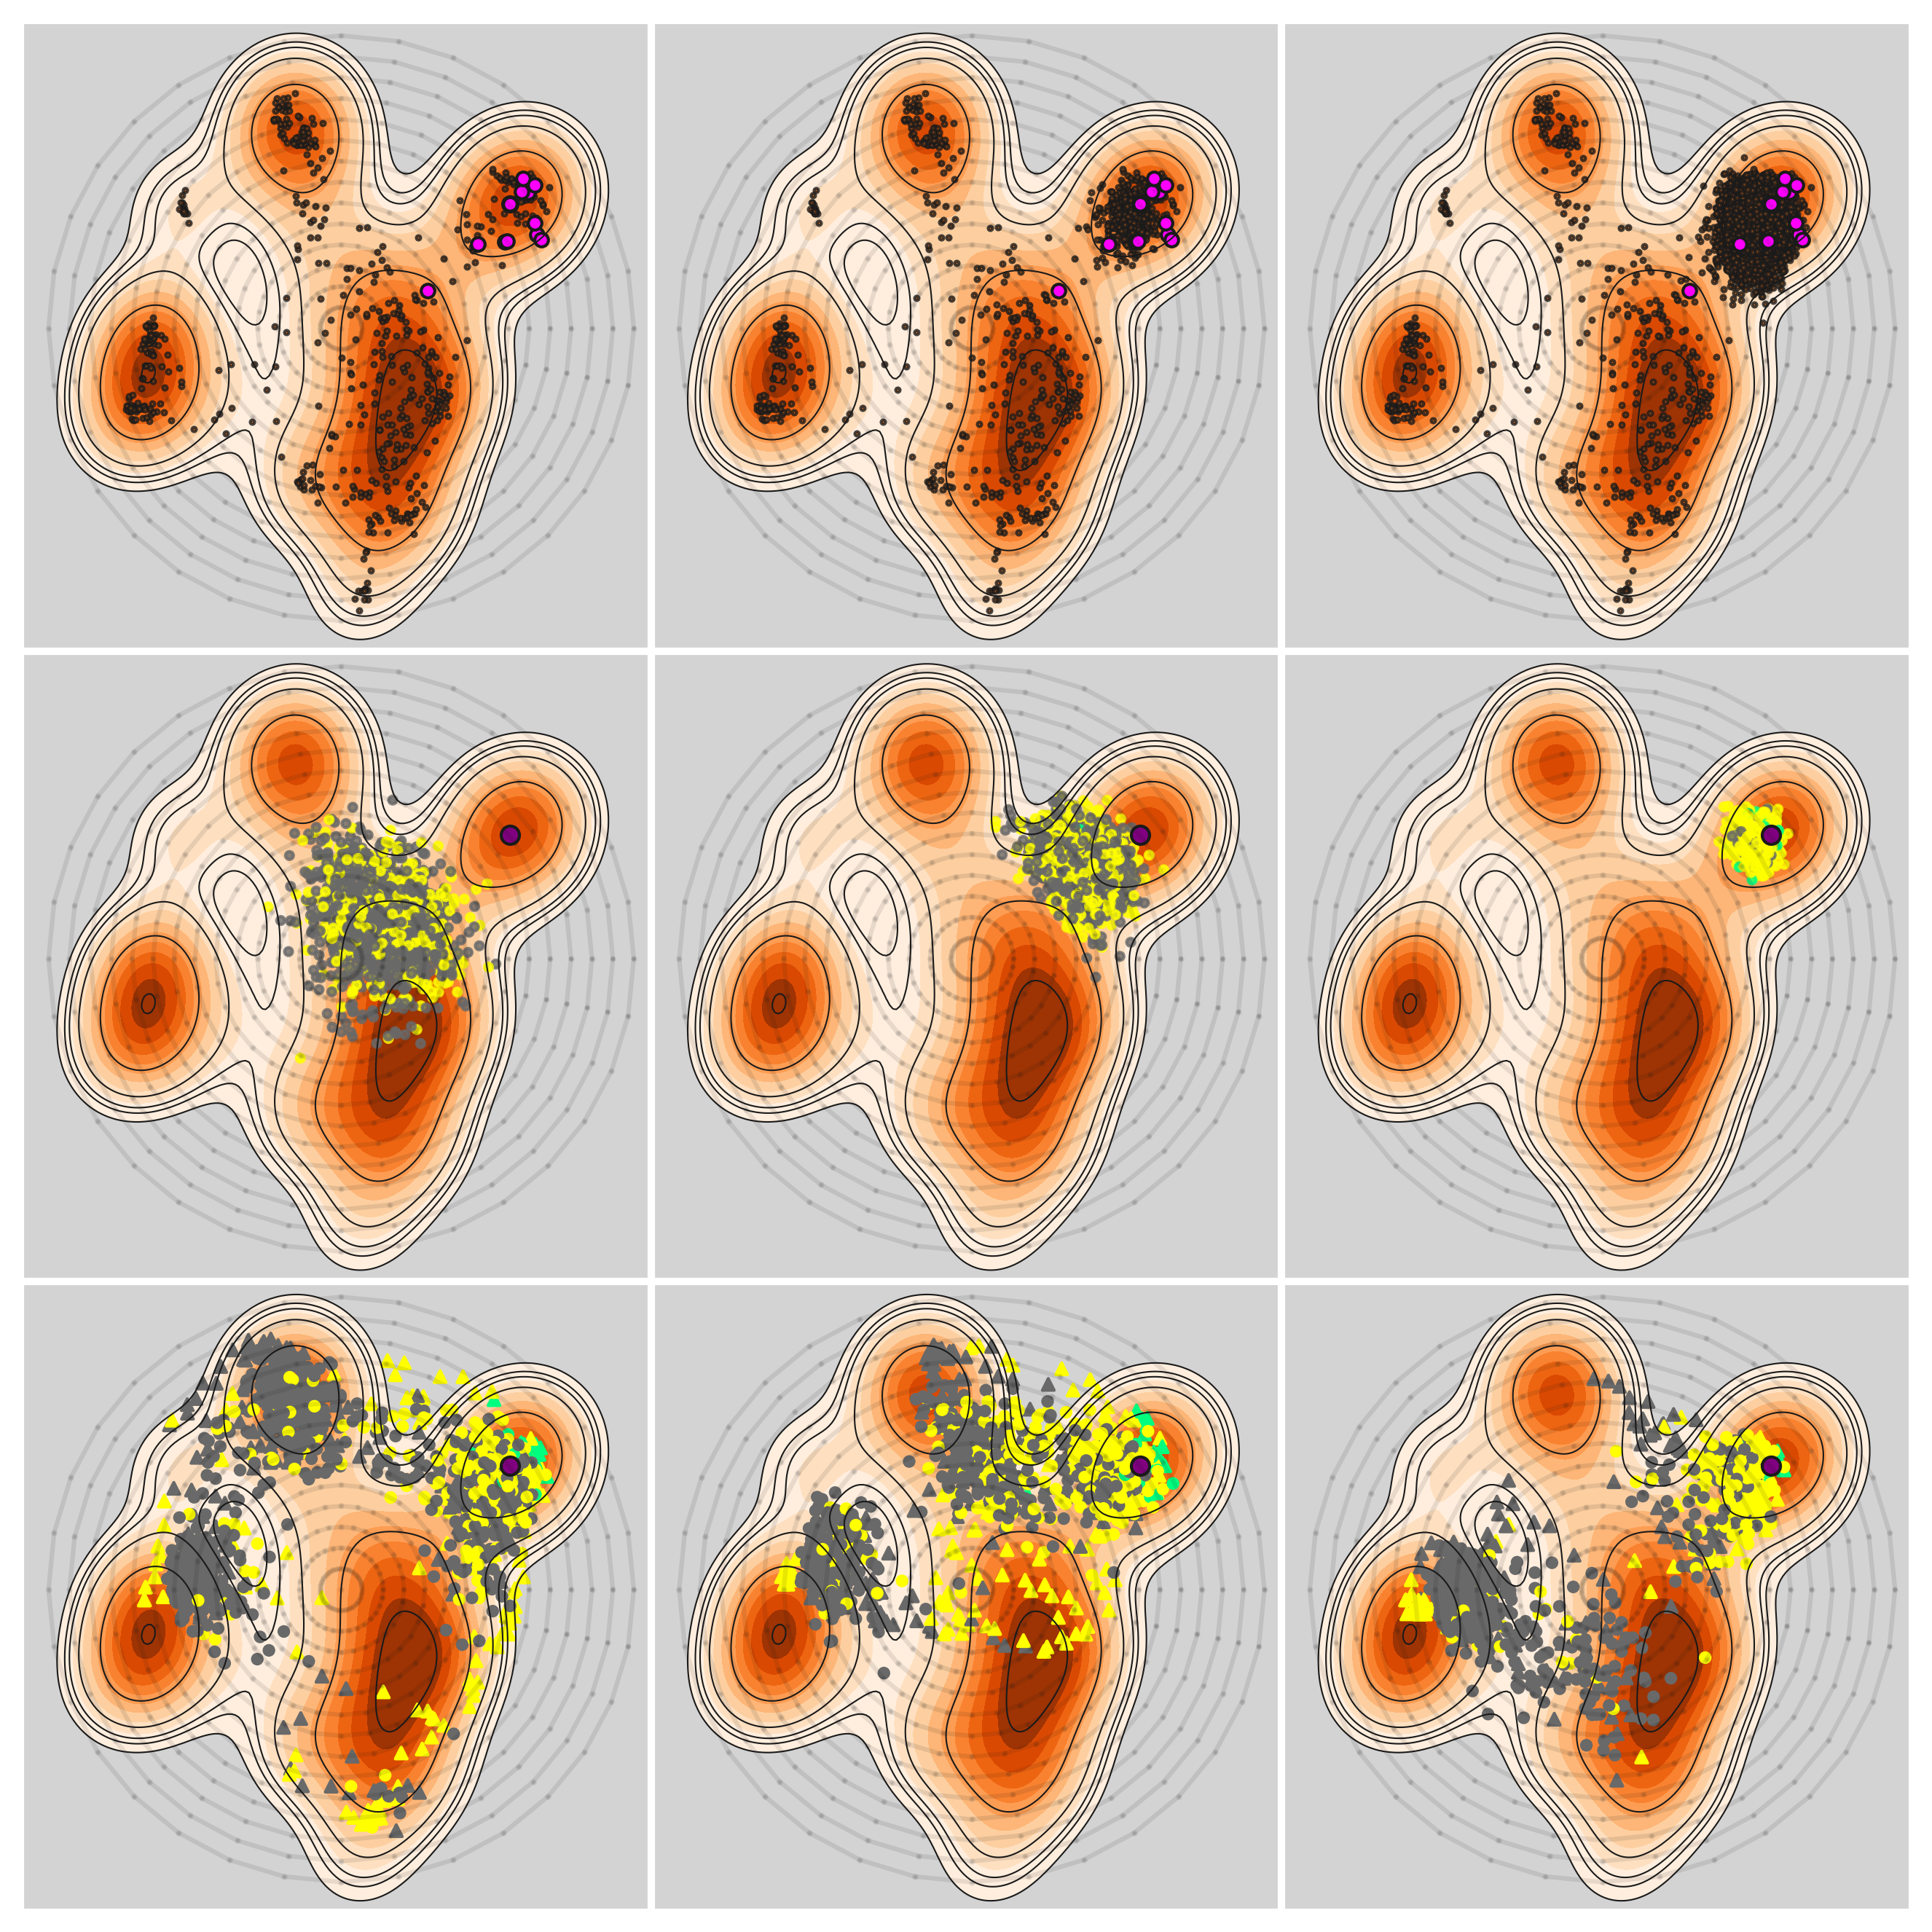

In [87]:
fig=plt.figure(figsize=(9,9), dpi=300)
#fig.set_facecolor('blue')

plt.subplot(3, 3, 1,facecolor='lightgrey')

plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False,n_level=30)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=2, c="chocolate",edgecolors="k" ,alpha=0.8)

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],s=25, c="purple" ,alpha=1,edgecolors="k")

plt.scatter(x_naturals_encoded[:,0], x_naturals_encoded[:,1],c="magenta" ,alpha=1,s=20, edgecolors="k")

# for i,row in t21_natural.iterrows():
#     plt.annotate(row['name'][3:],\
#                  (x_naturals_encoded[i,0]-0.1,x_naturals_encoded[i,1]),alpha=1, color="magenta")
plt.xticks([])
plt.yticks([])
plt.xlim([-15,15])
plt.ylim([-15,15])



plt.subplot(3, 3, 2,facecolor='lightgrey')

plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False,n_level=30)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")

#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=10, c="gold" ,alpha=0.8, edgecolors="k")
plt.scatter(x_train_encoded_r[:, 0][::-1], x_train_encoded_r[:, 1][::-1],s=2,c="chocolate", edgecolors="k" ,alpha=0.8)

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],s=25, c="purple" ,alpha=1,edgecolors="k")

plt.scatter(x_naturals_encoded[:,0], x_naturals_encoded[:,1],c="magenta" ,alpha=1,s=20, edgecolors="k")

# for i,row in t21_natural.iterrows():
#     plt.annotate(row['name'][3:],\
#                  (x_naturals_encoded[i,0]-0.1,x_naturals_encoded[i,1]),alpha=1, color="magenta")
plt.xticks([])
plt.yticks([])
plt.xlim([-15,15])
plt.ylim([-15,15])

plt.subplot(3, 3, 3,facecolor='lightgrey')

plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False,n_level=30)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=10, c="gold" ,alpha=0.8, edgecolors="k")
plt.scatter(x_train_encoded_all[:, 0][::-1], x_train_encoded_all[:, 1][::-1],s=2,c="chocolate" ,alpha=0.8, edgecolors="k")

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],s=25, c="purple" ,alpha=1,edgecolors="k")

plt.scatter(x_naturals_encoded[:,0], x_naturals_encoded[:,1],c="magenta" ,alpha=1,s=20, edgecolors="k")

# for i,row in t21_natural.iterrows():
#     plt.annotate(row['name'][3:],\
#                  (x_naturals_encoded[i,0]-0.1,x_naturals_encoded[i,1]),alpha=1, color="magenta")
plt.xticks([])
plt.yticks([])
plt.xlim([-15,15])
plt.ylim([-15,15])

plt.subplot(3, 3, 4,facecolor='lightgrey')
plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
#sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Greys",shade=False,shade_lowest=False,n_level=14)
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False,n_level=30)

ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=5, c="gold" ,alpha=0.5, edgecolors="k")
test_indices_ml=test_data[(test_data.category=="IS-MSA")].index
c=recolor(test_data[(test_data.category=="IS-MSA")])
plt.scatter(x_test_encoded[test_indices_ml, 0], x_test_encoded[test_indices_ml, 1],c= c,alpha=0.8,s=7)

# plt.scatter(x_test_encoded[test_data_rs_indices, 0], x_test_encoded[test_data_rs_indices, 1],marker="^",c= "deepskyblue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_ml_indices, 0], x_test_encoded[test_data_ml_indices, 1],marker=".",c= "blue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_lin_indices, 0], x_test_encoded[test_data_lin_indices, 1],marker="x",c= "orange",alpha=1,s=4)

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],c="purple" , edgecolors="k")
plt.xticks([])
plt.yticks([])
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.subplot(3, 3, 5,facecolor='lightgrey')
plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False,n_level=30)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=5, c="gold" ,alpha=1)
test_indices_ml=test_data[(test_data.category=="IS-MSAr")].index
c=recolor(test_data[(test_data.category=="IS-MSAr")])


plt.scatter(x_test_encoded[test_indices_ml, 0], x_test_encoded[test_indices_ml, 1],c= c,alpha=0.8,s=7)

# plt.scatter(x_test_encoded[test_data_rs_indices, 0], x_test_encoded[test_data_rs_indices, 1],marker="^",c= "deepskyblue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_ml_indices, 0], x_test_encoded[test_data_ml_indices, 1],marker=".",c= "blue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_lin_indices, 0], x_test_encoded[test_data_lin_indices, 1],marker="x",c= "orange",alpha=1,s=4)

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],c="purple" ,alpha=1, edgecolors="k")
plt.xticks([])
plt.yticks([])
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.subplot(3, 3, 6,facecolor='lightgrey')
plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False,n_level=30)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=5, c="gold" ,alpha=1, edgecolors="k")
test_indices_ml=test_data[(test_data.category=="IS-MSA+")].index
c=recolor(test_data[(test_data.category=="IS-MSA+")])

plt.scatter(x_test_encoded[test_indices_ml, 0], x_test_encoded[test_indices_ml, 1],c= c,s=7,alpha=0.8)

# plt.scatter(x_test_encoded[test_data_rs_indices, 0], x_test_encoded[test_data_rs_indices, 1],marker="^",c= "deepskyblue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_ml_indices, 0], x_test_encoded[test_data_ml_indices, 1],marker=".",c= "blue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_lin_indices, 0], x_test_encoded[test_data_lin_indices, 1],marker="x",c= "orange",alpha=1,s=4)

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],c="purple" ,alpha=1, edgecolors="k")
plt.xticks([])
plt.yticks([])

plt.xlim([-15,15])
plt.ylim([-15,15])
plt.subplot(3, 3, 7,facecolor='lightgrey')
plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=5, c="gold" ,alpha=1)
test_indices_ml=test_data[(test_data.category=="VAE-MSA")&(test_data.source=="most_likely")].index
test_indices_rs=test_data[(test_data.category=="VAE-MSA")&(test_data.source=="rand_samp")].index
ml_cols=recolor(test_data[(test_data.category=="VAE-MSA")&(test_data.source=="most_likely")])
rs_cols=recolor(test_data[(test_data.category=="VAE-MSA")&(test_data.source=="rand_samp")])
plt.scatter(x_test_encoded[test_indices_ml, 0], x_test_encoded[test_indices_ml, 1],marker="^",c= ml_cols,alpha=1,s=15)
plt.scatter(x_test_encoded[test_indices_rs, 0], x_test_encoded[test_indices_rs, 1],c= rs_cols,alpha=1.0,s=10)

# plt.scatter(x_test_encoded[test_data_rs_indices, 0], x_test_encoded[test_data_rs_indices, 1],marker="^",c= "deepskyblue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_ml_indices, 0], x_test_encoded[test_data_ml_indices, 1],marker=".",c= "blue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_lin_indices, 0], x_test_encoded[test_data_lin_indices, 1],marker="x",c= "orange",alpha=1,s=4)

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],c="purple" ,alpha=1, edgecolors="k")
plt.xticks([])
plt.yticks([])
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.subplot(3, 3, 8,facecolor='lightgrey')
plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False,n_level=30)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=5, c="gold" ,alpha=1)
test_indices_ml=test_data[(test_data.category=="VAE-MSAr")&(test_data.source=="most_likely")].index
test_indices_rs=test_data[(test_data.category=="VAE-MSAr")&(test_data.source=="rand_samp")].index
ml_cols=recolor(test_data[(test_data.category=="VAE-MSAr")&(test_data.source=="most_likely")])
rs_cols=recolor(test_data[(test_data.category=="VAE-MSAr")&(test_data.source=="rand_samp")])
plt.scatter(x_test_encoded[test_indices_ml, 0], x_test_encoded[test_indices_ml, 1],marker="^",c= ml_cols,alpha=1,s=15)
plt.scatter(x_test_encoded[test_indices_rs, 0], x_test_encoded[test_indices_rs, 1],c= rs_cols,alpha=1,s=10)
# plt.scatter(x_test_encoded[test_data_rs_indices, 0], x_test_encoded[test_data_rs_indices, 1],marker="^",c= "deepskyblue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_ml_indices, 0], x_test_encoded[test_data_ml_indices, 1],marker=".",c= "blue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_lin_indices, 0], x_test_encoded[test_data_lin_indices, 1],marker="x",c= "orange",alpha=1,s=4)

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],c="purple" ,alpha=1 ,edgecolors="k")
num=40
point=np.array([x1[num],y1[num]]).reshape(1,-1)
plt.xticks([])
plt.yticks([])
plt.xlim([-15,15])
plt.ylim([-15,15])

plt.subplot(3, 3, 9,facecolor='lightgrey')
plt.plot(x1,y1,"o",c="k",alpha=0.1,markersize=1,linewidth=0.5)
last=1    
for i,y in enumerate(y1):
    if y==y1[0] and i%2==1:
       plt.plot(x1[last:i],y1[last:i],c="k",alpha=0.1)
       if last!=1:
           plt.plot([x1[last],x1[i-1]],[y1[last],y1[i-1]],c="k",alpha=0.1)
       last=i
plt.plot(x1[last:i+1],y1[last:i+1],c="k",alpha=0.1)
plt.plot([x1[last],x1[i]],[y1[last],y1[i]],c="k",alpha=0.1)
ax2=sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],color="k",n_levels=30,linewidths= 0.5, linestyles="-")#,zorder=-1)#,shade=True,shade_lowest=False,n_levels=30)

c=0
for x in ax2.collections[-27:]:
        if c not in [2,11,24]:
            x.remove()
        c+=1
ax2.collections[-1].set_color("k")
sns.kdeplot(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],cmap="Oranges",shade=True,shade_lowest=False)#,zorder=-2)

#plt.scatter(x_train_encoded[:, 0][::-1], x_train_encoded[:, 1][::-1],s=15, c="gold" ,alpha=1)
test_indices_ml=test_data[(test_data.category=="VAE-MSA+")&(test_data.source=="most_likely")].index
test_indices_rs=test_data[(test_data.category=="VAE-MSA+")&(test_data.source=="rand_samp")].index
ml_cols=recolor(test_data[(test_data.category=="VAE-MSA+")&(test_data.source=="most_likely")])
rs_cols=recolor(test_data[(test_data.category=="VAE-MSA+")&(test_data.source=="rand_samp")])
plt.scatter(x_test_encoded[test_indices_ml, 0], x_test_encoded[test_indices_ml, 1],marker="^",c= ml_cols,alpha=1,s=15)
plt.scatter(x_test_encoded[test_indices_rs, 0], x_test_encoded[test_indices_rs, 1],c= rs_cols,alpha=1,s=10)

# plt.scatter(x_test_encoded[test_data_rs_indices, 0], x_test_encoded[test_data_rs_indices, 1],marker="^",c= "deepskyblue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_ml_indices, 0], x_test_encoded[test_data_ml_indices, 1],marker=".",c= "blue",alpha=1,s=4)
# plt.scatter(x_test_encoded[test_data_lin_indices, 0], x_test_encoded[test_data_lin_indices, 1],marker="x",c= "orange",alpha=1,s=4)

plt.scatter(x_train_encoded[0][0], x_train_encoded[0][1],c="purple" ,alpha=1, edgecolors="k")
num=40
point=np.array([x1[num],y1[num]]).reshape(1,-1)
plt.xticks([])
plt.yticks([])
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.tight_layout(w_pad=0.1,h_pad=0.1)
#plt.savefig("new_figs/VAE_embedding9x9_green.pdf")

In [90]:
def get_normalized_freq(data):
    sum_data=np.sum(data,axis=0)
    wm=sum_data.reshape(digit_size,sequence_size)
    pwm = normalize(wm+0.000001,axis=0, norm='l1')
    return pwm
from sklearn.preprocessing import normalize


In [91]:

lin_pwm=get_normalized_freq(training_data_one_hot)

In [93]:
def get_aa_coords(seq):
    indices=[]
    for i in range(len(seq)):
        indices.append(ORDER_LIST.index(seq[i]))
    return indices

wt_coords=get_aa_coords(wt_sequence)

In [96]:
one_hot_mutants=[]
for i,row in test_data.nlargest(100,"v97L_S").iterrows():
    mutant=row["aa_seq"]
    one_hot_mutants.append(translate_string_to_one_hot("".join(mutant),ORDER_LIST))

test_data_top=np.array([np.array(list(sample.flatten())).T for sample in one_hot_mutants])

In [97]:
top_pwm=get_normalized_freq(test_data_top)
indices=[]
for col in lin_pwm.T:
    indices.append(np.argmax(col[:]))

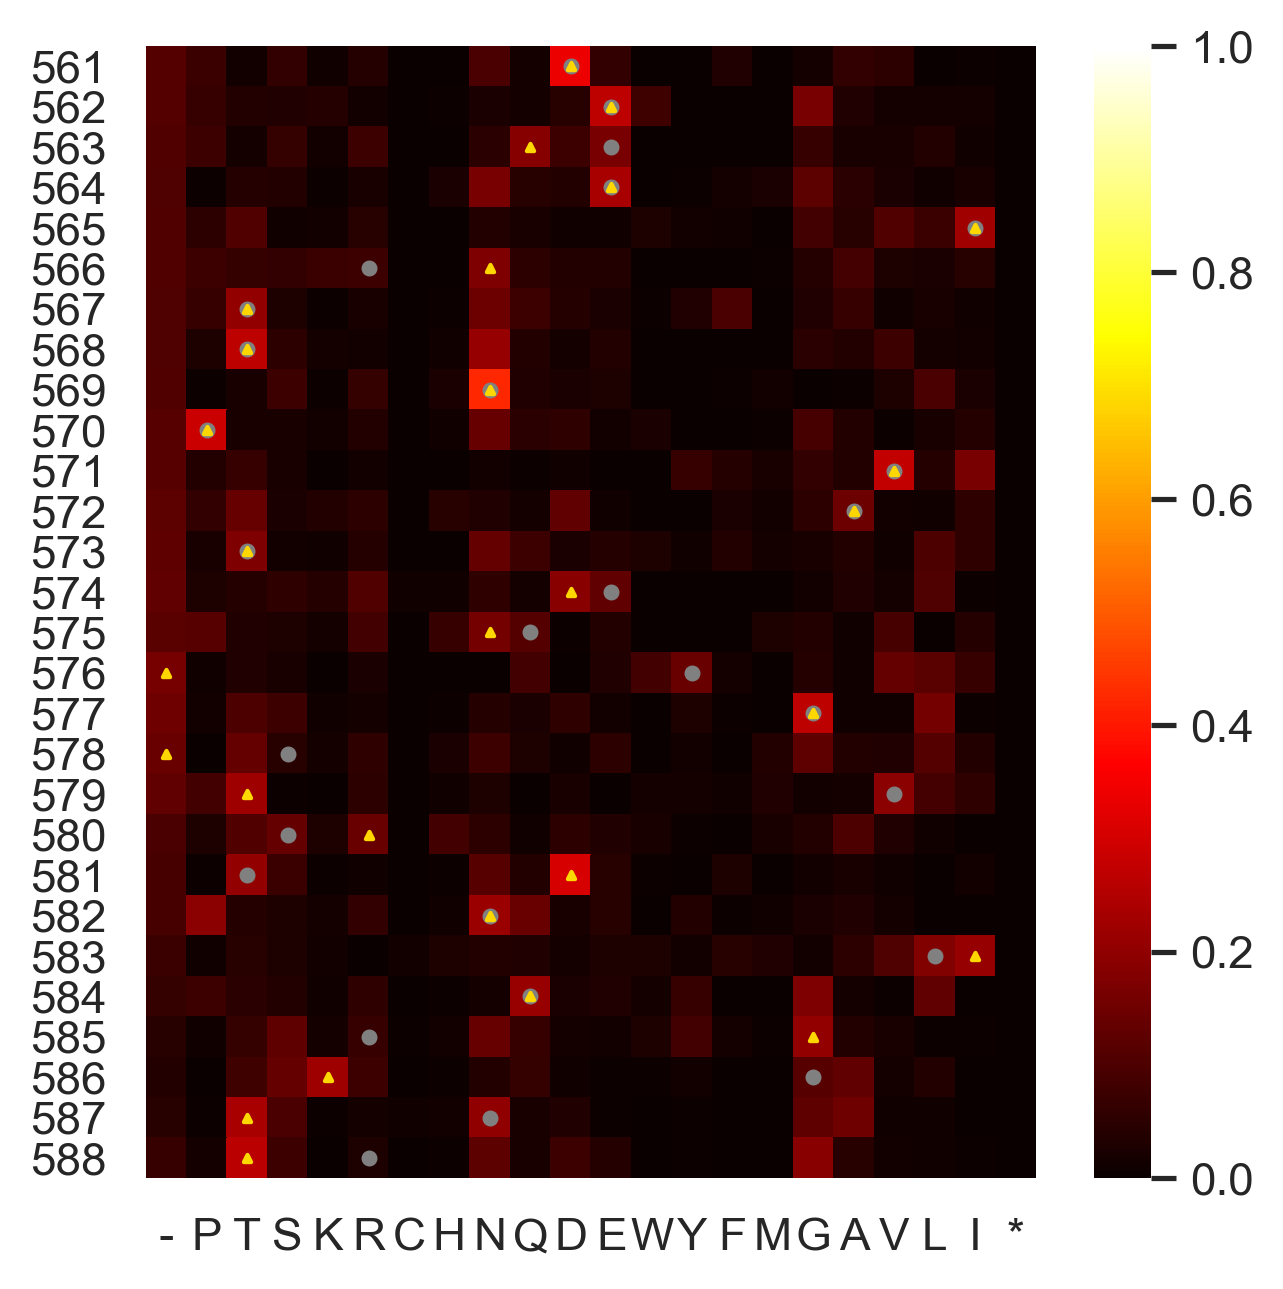

In [98]:
fig = plt.figure(figsize=(5,5),dpi=300)

sns.heatmap(lin_pwm.T,cmap="hot",yticklabels=range(561,589),\
            xticklabels=ORDER_LIST[:22],square=True,vmin=0,vmax=1);
plt.scatter([x+0.5 for x in wt_coords],[y+0.5 for y in range(28)],s=8,c="grey")

plt.scatter([x+0.5 for x in indices],[y+0.5 for y in range(28)],s=3,c="gold",marker="^")
#plt.tight_layout(w_pad=0.1,h_pad=0.1)
#plt.savefig("new_figs/pwm_lin_w_wt-ml.pdf")

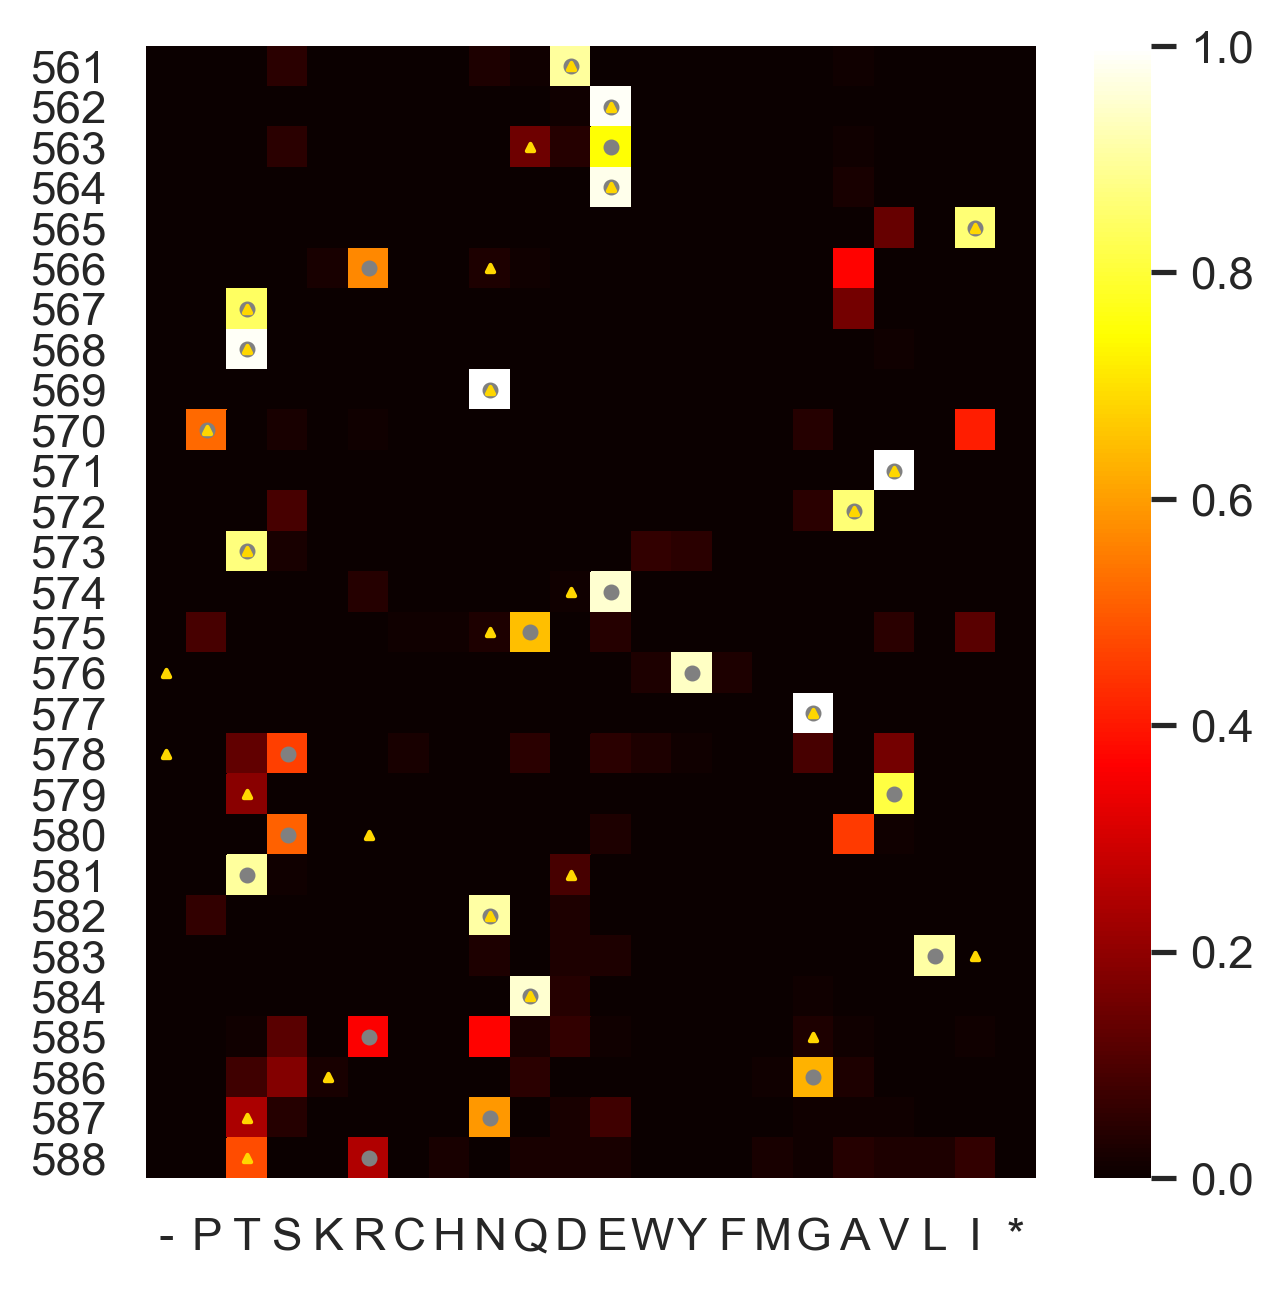

In [99]:
fig = plt.figure(figsize=(5,5),dpi=300)

sns.heatmap(top_pwm.T,cmap="hot",yticklabels=range(561,589),\
            xticklabels=ORDER_LIST[:22],square=True,vmin=0,vmax=1);
plt.scatter([x+0.5 for x in wt_coords],[y+0.5 for y in range(28)],s=8,c="grey")

plt.scatter([x+0.5 for x in indices],[y+0.5 for y in range(28)],s=3,c="gold",marker="^")
#plt.savefig("new_figs/pwm_top100_w_wt-ml.pdf")

In [100]:
result=np.zeros((12,12))
for i in range(0,12):
    for j in range(0,12):
        result[i][j]=editdistance.eval(t21_natural.iloc[i]["tile"],t21_natural.iloc[j]["tile"])
    

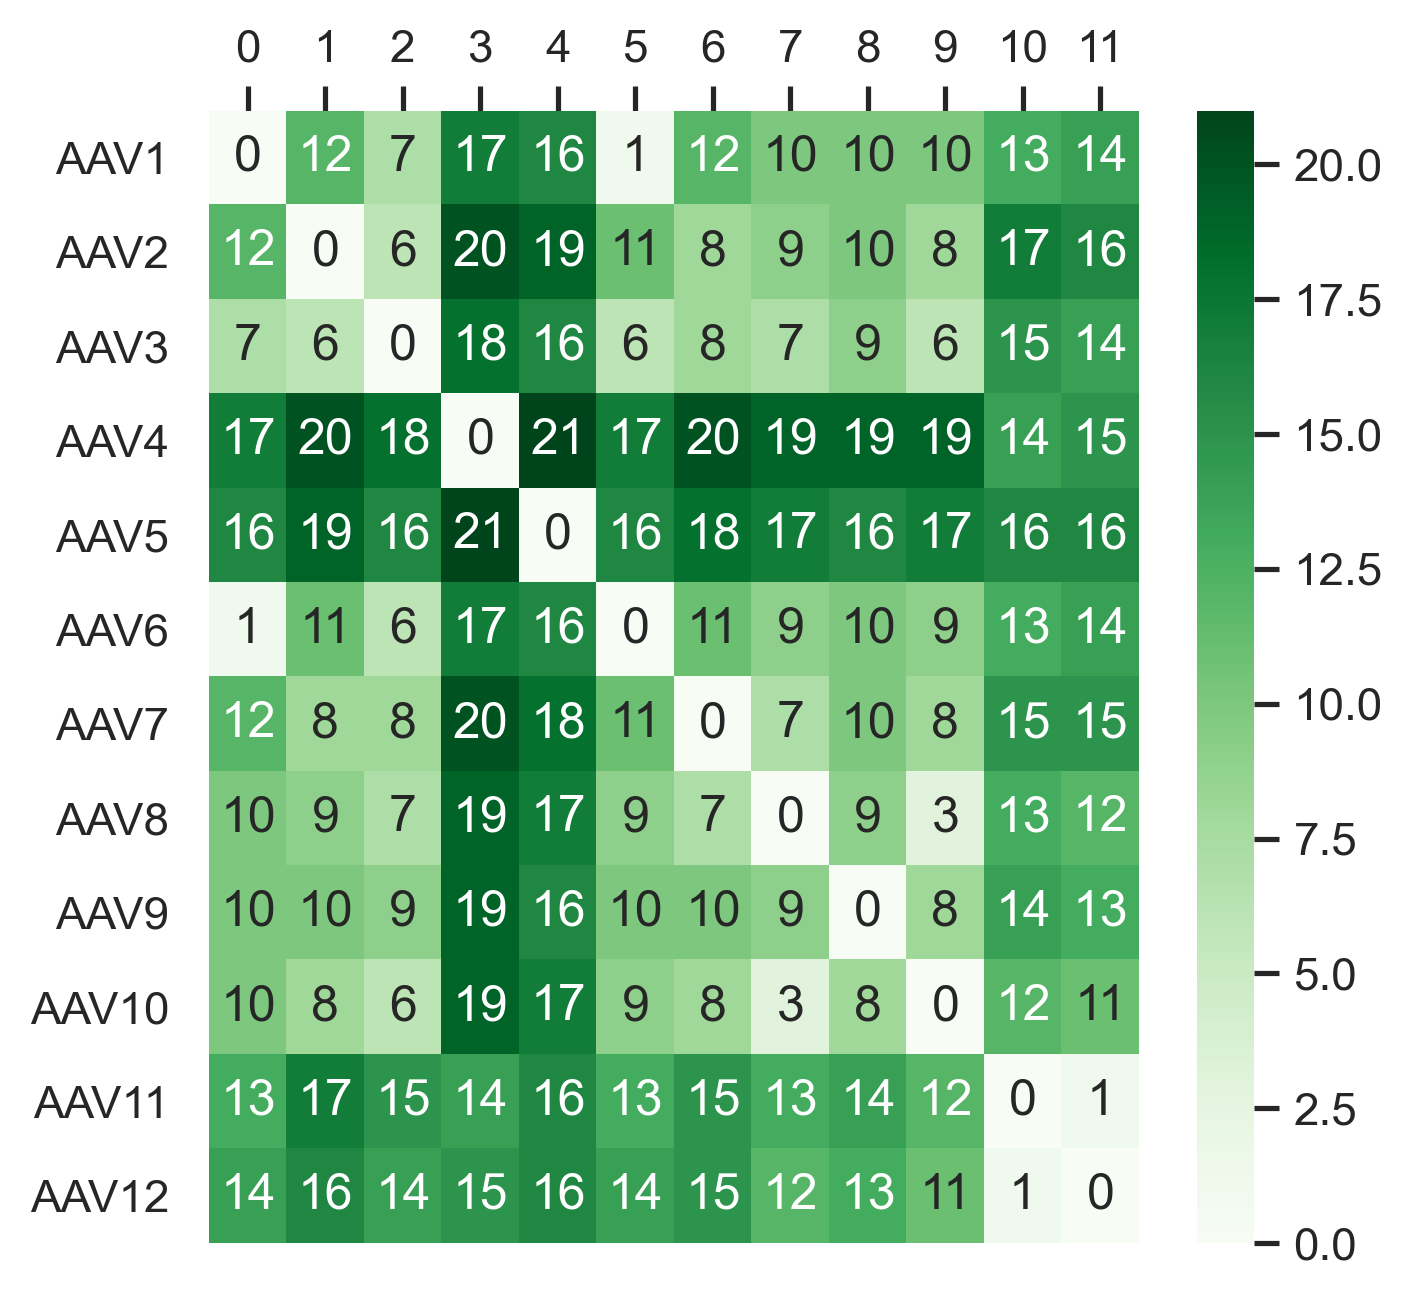

In [101]:
fig = plt.figure(figsize=(5,5),dpi=300)

ax=sns.heatmap(result, annot=True, yticklabels=t21_natural["name"], cmap="Greens")
 # x axis on top
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top

#plt.savefig("new_figs/distances.pdf")